In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=465044665732f2c02a9a3593d2b86a5b


In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

banda aceh id
busselton au
punta arenas cl
acapulco mx
ponta do sol cv
butaritari ki
luziania br
vanimo pg
lae pg
san patricio mx
rakiv lis ua
yarkovo ru
jamestown sh
cidreira br
thompson ca
hobart au
punta arenas cl
port alfred za
rikitea pf
apricena it
east london za
portree gb
atuona pf
illoqqortoormiut gl
hasaki jp
kahului us
torbay ca
plouzane fr
punta arenas cl
banki in
albany au
sistranda no
port elizabeth za
rikitea pf
hobart au
necochea ar
vagur fo
cobija bo
thompson ca
avarua ck
mawlaik mm
belushya guba ru
sao filipe cv
amderma ru
edelira py
edgewater us
lebu cl
bluff nz
dudinka ru
kodiak us
ostrovnoy ru
pisco pe
lompoc us
bandarbeyla so
ushuaia ar
puerto baquerizo moreno ec
ancud cl
jurado co
wenling cn
dengzhou cn
lagoa pt
albany au
port alfred za
busselton au
busselton au
castro cl
hermanus za
marcona pe
tura ru
punta arenas cl
rikitea pf
arraial do cabo br
severo-kurilsk ru
kruisfontein za
harper lr
sabha ly
ugoofaaru mv
hualmay pe
barrow us
margate za
jining cn
ushuaia a

busselton au
new norfolk au
nikolskoye ru
tiksi ru
khatanga ru
fortuna us
avarua ck
camapua br
vaini to
mahebourg mu
touros br
lamar us
severo-yeniseyskiy ru
dikson ru
tambacounda sn
cape town za
yellowknife ca
kavaratti in
kieta pg
hilo us
bontang id
souillac mu
thomaston us
punta arenas cl
marystown ca
ushuaia ar
hilo us
turukhansk ru
mount isa au
hailey us
changli cn
qaanaaq gl
belushya guba ru
aklavik ca
butaritari ki
bredasdorp za
atuona pf
hermanus za
chuy uy
talas kg
ushuaia ar
chokurdakh ru
mataura pf
taolanaro mg
rapid valley us
saint george bm
nantucket us
tasiilaq gl
sibolga id
souillac mu
ravar ir
mustasaari fi
madang pg
tessalit ml
ushuaia ar
harper lr
hermanus za
rikitea pf
pevek ru
bodden town ky
ilulissat gl
ushuaia ar
muros es
vaini to
qaanaaq gl
rorvik no
barentsburg sj
upernavik gl
vaini to
albany au
belushya guba ru
owando cg
burica pa
avarua ck
ushuaia ar
punta arenas cl
nikolskoye ru
eyl so
ushuaia ar
rikitea pf
tasiilaq gl
eyl so
jamestown sh
santiago de chuco pe

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [8]:
import requests
requests.__version__

'2.25.1'

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | banda aceh
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | acapulco
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | luziania
Processing Record 8 of Set 1 | vanimo
Processing Record 9 of Set 1 | lae
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | rakiv lis
Processing Record 12 of Set 1 | yarkovo
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | apricena
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | portree
Processing Record 22 of Set 1 | atuona
Processing Record 23 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2

Processing Record 41 of Set 4 | shagonar
Processing Record 42 of Set 4 | eidsvag
Processing Record 43 of Set 4 | japura
Processing Record 44 of Set 4 | vardo
Processing Record 45 of Set 4 | staryy biser
City not found. Skipping...
Processing Record 46 of Set 4 | sobolevo
Processing Record 47 of Set 4 | esperance
Processing Record 48 of Set 4 | kamenka
Processing Record 49 of Set 4 | naze
Processing Record 50 of Set 4 | baiao
Processing Record 1 of Set 5 | tigil
Processing Record 2 of Set 5 | salalah
Processing Record 3 of Set 5 | camocim
Processing Record 4 of Set 5 | victoria
Processing Record 5 of Set 5 | novo aripuana
Processing Record 6 of Set 5 | karasburg
Processing Record 7 of Set 5 | lilongwe
Processing Record 8 of Set 5 | morrope
Processing Record 9 of Set 5 | saldanha
Processing Record 10 of Set 5 | pacific grove
Processing Record 11 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 12 of Set 5 | iberia
Processing Record 13 of Set 5 | kiunga
Processing Record 14 of Set 5

Processing Record 34 of Set 8 | turukhansk
Processing Record 35 of Set 8 | hailey
Processing Record 36 of Set 8 | changli
Processing Record 37 of Set 8 | aklavik
Processing Record 38 of Set 8 | talas
Processing Record 39 of Set 8 | rapid valley
Processing Record 40 of Set 8 | nantucket
Processing Record 41 of Set 8 | sibolga
Processing Record 42 of Set 8 | ravar
Processing Record 43 of Set 8 | mustasaari
Processing Record 44 of Set 8 | madang
Processing Record 45 of Set 8 | tessalit
Processing Record 46 of Set 8 | bodden town
Processing Record 47 of Set 8 | rorvik
Processing Record 48 of Set 8 | owando
Processing Record 49 of Set 8 | eyl
Processing Record 50 of Set 8 | santiago de chuco
Processing Record 1 of Set 9 | jiaojiang
Processing Record 2 of Set 9 | woodland
Processing Record 3 of Set 9 | broken hill
Processing Record 4 of Set 9 | berlevag
Processing Record 5 of Set 9 | porirua
Processing Record 6 of Set 9 | ngukurr
City not found. Skipping...
Processing Record 7 of Set 9 | por

City not found. Skipping...
Processing Record 24 of Set 12 | ewa beach
Processing Record 25 of Set 12 | alice springs
Processing Record 26 of Set 12 | tocopilla
Processing Record 27 of Set 12 | mandera
Processing Record 28 of Set 12 | batemans bay
Processing Record 29 of Set 12 | srednekolymsk
Processing Record 30 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 31 of Set 12 | merauke
Processing Record 32 of Set 12 | najran
Processing Record 33 of Set 12 | viedma
Processing Record 34 of Set 12 | ondjiva
Processing Record 35 of Set 12 | sorland
Processing Record 36 of Set 12 | chkalovskoye
Processing Record 37 of Set 12 | tokur
Processing Record 38 of Set 12 | kharan
Processing Record 39 of Set 12 | abalak
Processing Record 40 of Set 12 | napuro
Processing Record 41 of Set 12 | noyabrsk
Processing Record 42 of Set 12 | alofi
Processing Record 43 of Set 12 | axim
Processing Record 44 of Set 12 | itaituba
Processing Record 45 of Set 12 | rawson
Processing Record 46 of S

In [16]:
len(city_data)

590

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Banda Aceh,5.5577,95.3222,86.83,64,9,10.27,ID,2021-02-14 05:58:50
1,Busselton,-33.6500,115.3333,90.00,28,5,3.00,AU,2021-02-14 05:52:57
2,Punta Arenas,-53.1500,-70.9167,42.80,81,75,14.97,CL,2021-02-14 05:52:00
3,Acapulco,16.8634,-99.8901,69.84,63,0,6.67,MX,2021-02-14 05:52:12
4,Ponta Do Sol,32.6667,-17.1000,53.01,66,0,3.00,PT,2021-02-14 05:53:30
5,Butaritari,3.0707,172.7902,81.14,79,85,16.42,KI,2021-02-14 05:52:57
6,Luziania,-16.2525,-47.9503,66.20,100,75,3.44,BR,2021-02-14 05:58:51
7,Vanimo,-2.6741,141.3028,81.16,83,60,11.16,PG,2021-02-14 05:54:19
8,Lae,-6.7221,146.9847,83.37,71,91,7.36,PG,2021-02-14 05:58:51
9,San Patricio,28.0170,-97.5169,33.80,86,90,12.66,US,2021-02-14 05:53:13


In [18]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Banda Aceh,ID,2021-02-14 05:58:50,5.5577,95.3222,86.83,64,9,10.27
1,Busselton,AU,2021-02-14 05:52:57,-33.6500,115.3333,90.00,28,5,3.00
2,Punta Arenas,CL,2021-02-14 05:52:00,-53.1500,-70.9167,42.80,81,75,14.97
3,Acapulco,MX,2021-02-14 05:52:12,16.8634,-99.8901,69.84,63,0,6.67
4,Ponta Do Sol,PT,2021-02-14 05:53:30,32.6667,-17.1000,53.01,66,0,3.00
5,Butaritari,KI,2021-02-14 05:52:57,3.0707,172.7902,81.14,79,85,16.42
6,Luziania,BR,2021-02-14 05:58:51,-16.2525,-47.9503,66.20,100,75,3.44
7,Vanimo,PG,2021-02-14 05:54:19,-2.6741,141.3028,81.16,83,60,11.16
8,Lae,PG,2021-02-14 05:58:51,-6.7221,146.9847,83.37,71,91,7.36
9,San Patricio,US,2021-02-14 05:53:13,28.0170,-97.5169,33.80,86,90,12.66


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

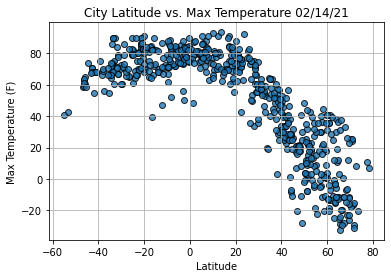

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

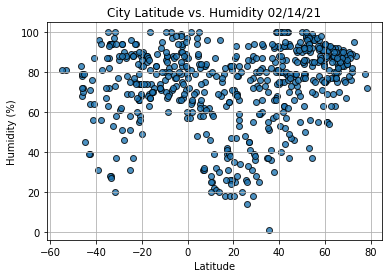

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

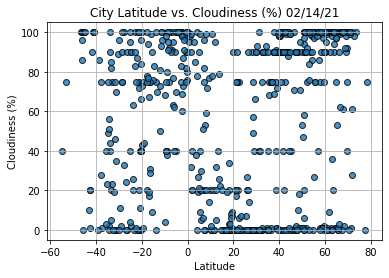

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

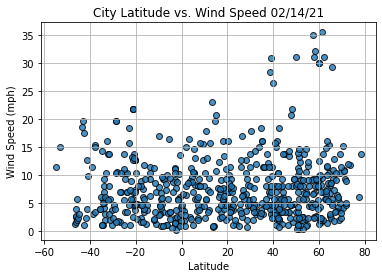

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()